<a href="https://colab.research.google.com/github/rohit78u/FDE-LAB-2/blob/main/FDE_LAb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- STEP 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
from google.colab import files
uploaded  = files.upload()

Saving patient_feedback.json to patient_feedback.json
Saving patients_data_with_doctor.csv to patients_data_with_doctor.csv
Saving doctors_info.csv to doctors_info.csv


In [ ]:
# --- STEP 2: Load Data ---
patients_df = pd.read_csv("patients_data_with_doctor.csv")
doctors_df = pd.read_csv("doctors_info.csv")
with open("patient_feedback.json", "r") as f:
    feedback_data = json.load(f)
feedback_df = pd.DataFrame(feedback_data)

patients_df.head(), doctors_df.head(), feedback_df.head()

(  treatment_id patient_id doctor_id treatment_type  treatment_cost  room_cost  \
 0        T0001      P0067      D006           part         2723.53    1932.58   
 1        T0002      P0006      D022        machine         3963.16    2215.53   
 2        T0003      P0637      D014           seat         4108.71    4958.21   
 3        T0004      P0314      D003           star         4793.77    1614.28   
 4        T0005      P0326      D012            art         4138.91    2779.05   
 
   treatment_date  
 0     2025-08-04  
 1     2024-09-29  
 2     2024-09-14  
 3     2024-09-25  
 4     2024-10-11  ,
   doctor_id      doctor_name          specialty
 0      D001  Cheyenne Wilson  Drilling engineer
 1      D002     Taylor Potts     Pharmacologist
 2      D003      Daniel Frye       Metallurgist
 3      D004     Crystal West    Patent examiner
 4      D005   Jennifer Smith       Tour manager,
   patient_id treatment_id  patient_feedback_score review_date
 0      P0001         T052 

In [ ]:
# Debug mismatches between patients and feedback

print("Sample treatment_id in patients:", patients_df["treatment_id"].unique()[:10])
print("Sample treatment_id in feedback:", feedback_df["treatment_id"].unique()[:10])

print("Sample patient_id in patients:", patients_df["patient_id"].unique()[:10])
print("Sample patient_id in feedback:", feedback_df["patient_id"].unique()[:10])

# Check common treatment_ids
common_treatments = set(patients_df["treatment_id"]).intersection(set(feedback_df["treatment_id"]))
print("Number of common treatment_ids:", len(common_treatments))

# Check common patient_ids
common_patients = set(patients_df["patient_id"]).intersection(set(feedback_df["patient_id"]))
print("Number of common patient_ids:", len(common_patients))

# Check if (patient_id, treatment_id) pairs match
pairs_patients = set(zip(patients_df["patient_id"], patients_df["treatment_id"]))
pairs_feedback = set(zip(feedback_df["patient_id"], feedback_df["treatment_id"]))
common_pairs = pairs_patients.intersection(pairs_feedback)

print("Number of matching patient+treatment pairs:", len(common_pairs))
print("Total patient+treatment pairs in patients:", len(pairs_patients))
print("Total patient+treatment pairs in feedback:", len(pairs_feedback))

# Show some missing pairs
missing_pairs = list(pairs_patients - pairs_feedback)[:10]
print("Example patient+treatment pairs in patients but not in feedback:", missing_pairs)


Sample treatment_id in patients: ['T0001' 'T0002' 'T0003' 'T0004' 'T0005' 'T0006' 'T0007' 'T0008' 'T0009'
 'T0010']
Sample treatment_id in feedback: ['T0052' 'T0093' 'T0015' 'T0072' 'T0061' 'T0021' 'T0083' 'T0087' 'T0075'
 'T0088']
Sample patient_id in patients: ['P0067' 'P0006' 'P0637' 'P0314' 'P0326' 'P0565' 'P0578' 'P0826' 'P0506'
 'P0082']
Sample patient_id in feedback: ['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010']
Number of common treatment_ids: 100
Number of common patient_ids: 633
Number of matching patient+treatment pairs: 4
Total patient+treatment pairs in patients: 1000
Total patient+treatment pairs in feedback: 1000
Example patient+treatment pairs in patients but not in feedback: [('P0058', 'T0643'), ('P0619', 'T0919'), ('P0329', 'T0512'), ('P0639', 'T0597'), ('P0800', 'T0102'), ('P0801', 'T0400'), ('P0446', 'T0772'), ('P0463', 'T0846'), ('P0803', 'T0814'), ('P0768', 'T0868')]


In [ ]:
# Fix treatment_id formatting
patients_df["treatment_id"] = patients_df["treatment_id"].str.replace("T", "").astype(int).apply(lambda x: f"T{x:03d}")
feedback_df["treatment_id"] = feedback_df["treatment_id"].str.replace("T", "").astype(int).apply(lambda x: f"T{x:03d}")


In [ ]:
# Normalize IDs
patients_df["treatment_id"] = patients_df["treatment_id"].str.replace("T", "").astype(int).apply(lambda x: f"T{x:03d}")
feedback_df["treatment_id"] = feedback_df["treatment_id"].str.replace("T", "").astype(int).apply(lambda x: f"T{x:03d}")

# Merge patients + feedback
merged_df = pd.merge(patients_df, feedback_df, on=["patient_id", "treatment_id"], how="left")


In [ ]:
# --- STEP 3: Merge Data ---
# Normalize treatment_id format (make them T#### with 4 digits)
patients_df["treatment_id"] = patients_df["treatment_id"].str.replace("T", "").astype(int).apply(lambda x: f"T{x:04d}")
feedback_df["treatment_id"] = feedback_df["treatment_id"].str.replace("T", "").astype(int).apply(lambda x: f"T{x:04d}")

# Merge patients + feedback
merged_df = pd.merge(patients_df, feedback_df, on=["patient_id", "treatment_id"], how="left")

# Merge with doctors info
merged_df = pd.merge(merged_df, doctors_df, on="doctor_id", how="left")

merged_df.head()


,treatment_id,patient_id,doctor_id,treatment_type,treatment_cost,room_cost,treatment_date,patient_feedback_score,review_date,doctor_name,specialty
0,T0001,P0067,D006,part,2723.53,1932.58,2025-08-04,NaN,NaN,John Morales,"Scientist, clinical (histocompatibility and im..."
1,T0002,P0006,D022,machine,3963.16,2215.53,2024-09-29,NaN,NaN,Brandon Byrd,"Education officer, museum"
2,T0003,P0637,D014,seat,4108.71,4958.21,2024-09-14,NaN,NaN,Antonio Stone,Nutritional therapist
3,T0004,P0314,D003,star,4793.77,1614.28,2024-09-25,NaN,NaN,Daniel Frye,Metallurgist
4,T0005,P0326,D012,art,4138.91,2779.05,2024-10-11,NaN,NaN,Cynthia Rodriguez,Automotive engineer


Index(['treatment_id', 'patient_id', 'doctor_id', 'treatment_type',
       'treatment_cost', 'room_cost', 'treatment_date',
       'patient_feedback_score', 'review_date', 'doctor_name', 'specialty',
       'feedback_category', 'review_year', 'review_month'],
      dtype='object')
Top 5 Doctors by Revenue:
doctor_name
Gabriel Stone      77100.77
Brooke Levine      77026.81
Vanessa Stewart    68545.49
Lisa Gray          68084.00
Tyler Vance        67386.92
Name: treatment_cost, dtype: float64


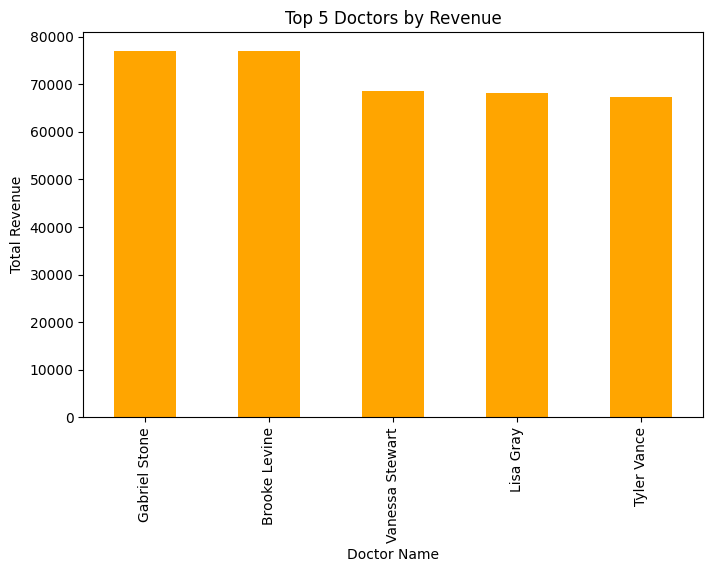

In [ ]:
# --- Top 5 Doctors by Revenue ---

# Check available columns to confirm revenue field name
print(merged_df.columns)

# Assuming revenue is stored in column 'treatment_cost'
top_doctors_revenue = (
    merged_df.groupby("doctor_name")["treatment_cost"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Top 5 Doctors by Revenue:")
print(top_doctors_revenue)

# Plot for better visualization
import matplotlib.pyplot as plt

top_doctors_revenue.plot(kind="bar", figsize=(8,5), color="orange")
plt.title("Top 5 Doctors by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Doctor Name")
plt.show()


In [ ]:
# --- STEP 4: Feature Engineering (Add new columns) ---

# Convert feedback score to numeric
merged_df["patient_feedback_score"] = pd.to_numeric(merged_df["patient_feedback_score"], errors="coerce")

# Define feedback category
def categorize_feedback(score):
    if pd.isna(score):
        return "No Feedback"
    elif score < 2.5:
        return "Poor"
    elif score < 3.5:
        return "Average"
    elif score < 4.5:
        return "Good"
    else:
        return "Excellent"

merged_df["feedback_category"] = merged_df["patient_feedback_score"].apply(categorize_feedback)

# Extract year & month from review_date
merged_df["review_date"] = pd.to_datetime(merged_df["review_date"], errors="coerce")
merged_df["review_year"] = merged_df["review_date"].dt.year
merged_df["review_month"] = merged_df["review_date"].dt.month

# Debugging check
print("Total rows:", len(merged_df))
print("Rows with No Feedback:", (merged_df['feedback_category'] == "No Feedback").sum())
print("Unique treatment IDs in patients:", patients_df['treatment_id'].nunique())
print("Unique treatment IDs in feedback:", feedback_df['treatment_id'].nunique())

merged_df[["patient_feedback_score", "feedback_category", "review_date"]].head(10)


Total rows: 1000
Rows with No Feedback: 996
Unique treatment IDs in patients: 1000
Unique treatment IDs in feedback: 100


,patient_feedback_score,feedback_category,review_date
0,NaN,No Feedback,NaT
1,NaN,No Feedback,NaT
2,NaN,No Feedback,NaT
3,NaN,No Feedback,NaT
4,NaN,No Feedback,NaT
5,NaN,No Feedback,NaT
6,NaN,No Feedback,NaT
7,NaN,No Feedback,NaT
8,NaN,No Feedback,NaT
9,NaN,No Feedback,NaT


In [ ]:
# --- STEP 5: Analysis ---
print("\nAverage Feedback per Doctor:")
print(merged_df.groupby("doctor_name")["patient_feedback_score"].mean().sort_values(ascending=False).head())

print("\nAverage Feedback per Specialty:")
print(merged_df.groupby("specialty")["patient_feedback_score"].mean().sort_values(ascending=False).head())

print("\nFeedback Category Counts:")
print(merged_df["feedback_category"].value_counts())


Average Feedback per Doctor:
doctor_name
Clinton Schmidt     4.6
Claudia Robinson    4.3
Brooke Levine       2.2
Brandon Byrd        1.5
Aaron Lyons DDS     NaN
Name: patient_feedback_score, dtype: float64

Average Feedback per Specialty:
specialty
Forensic scientist           4.6
Advertising art director     4.3
Retail buyer                 2.2
Education officer, museum    1.5
Accommodation manager        NaN
Name: patient_feedback_score, dtype: float64

Feedback Category Counts:
feedback_category
No Feedback    996
Poor             2
Excellent        1
Good             1
Name: count, dtype: int64


/tmp/ipython-input-1398888533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="feedback_category", palette="viridis")


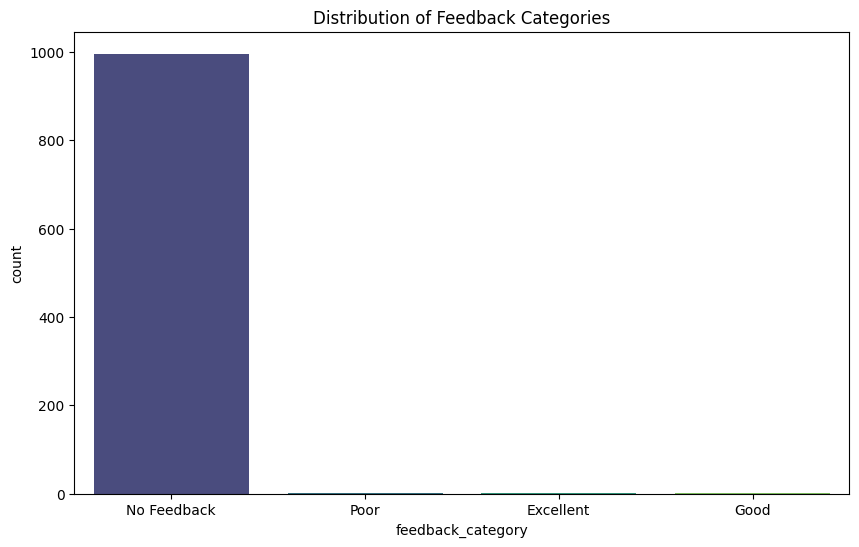

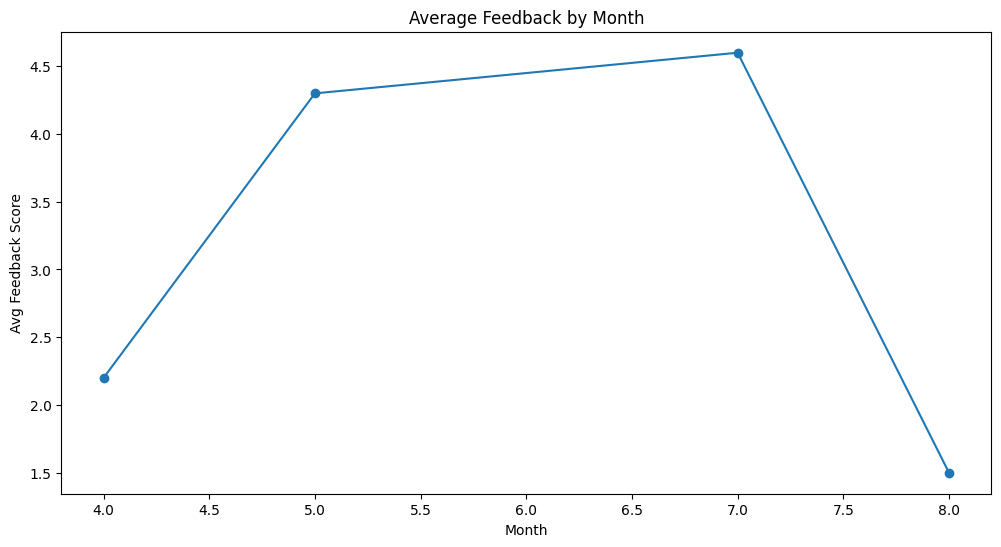

/tmp/ipython-input-1398888533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_doctors.values, y=top_doctors.index, palette="coolwarm")


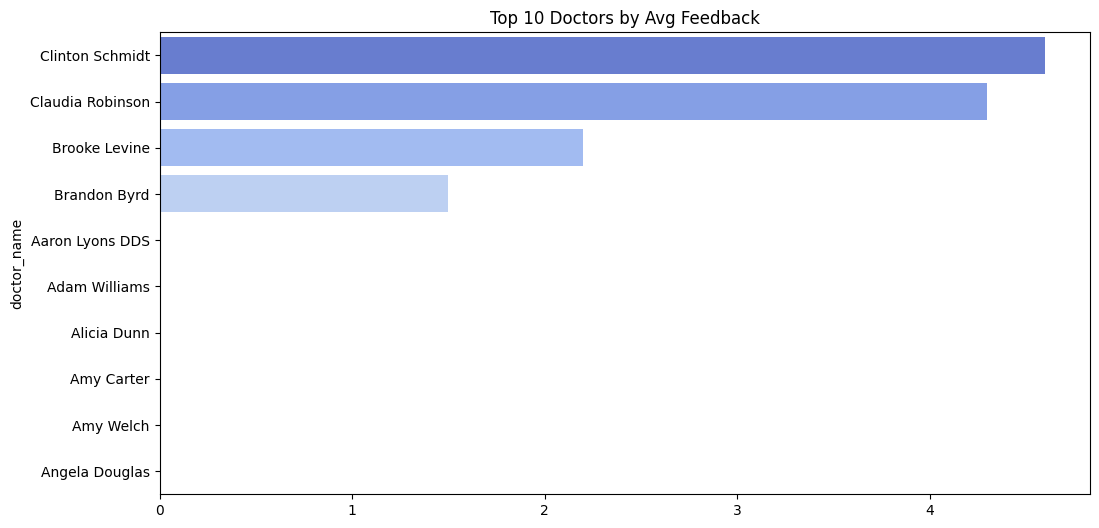

In [ ]:
# --- STEP 6: Visualization ---
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x="feedback_category", palette="viridis")
plt.title("Distribution of Feedback Categories")
plt.show()

plt.figure(figsize=(12,6))
merged_df.groupby("review_month")["patient_feedback_score"].mean().plot(kind="line", marker="o")
plt.title("Average Feedback by Month")
plt.xlabel("Month")
plt.ylabel("Avg Feedback Score")
plt.show()

plt.figure(figsize=(12,6))
top_doctors = merged_df.groupby("doctor_name")["patient_feedback_score"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_doctors.values, y=top_doctors.index, palette="coolwarm")
plt.title("Top 10 Doctors by Avg Feedback")
plt.show()